In [327]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
pd.set_option('display.max_columns', 30) # set so can see all columns of the DataFrame

In [328]:
# Import the data
df = pd.read_csv("bank/bank-full.csv", sep=";")

In [329]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [330]:
n = df.shape[0]
n

45211

Hence there are 45211 entries in this data.

In [331]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null vallues in the dataframe.

# Non-numeric data
The entries contain the following unique vales in each column. The month value is also omitted since we already know what that will yeild.

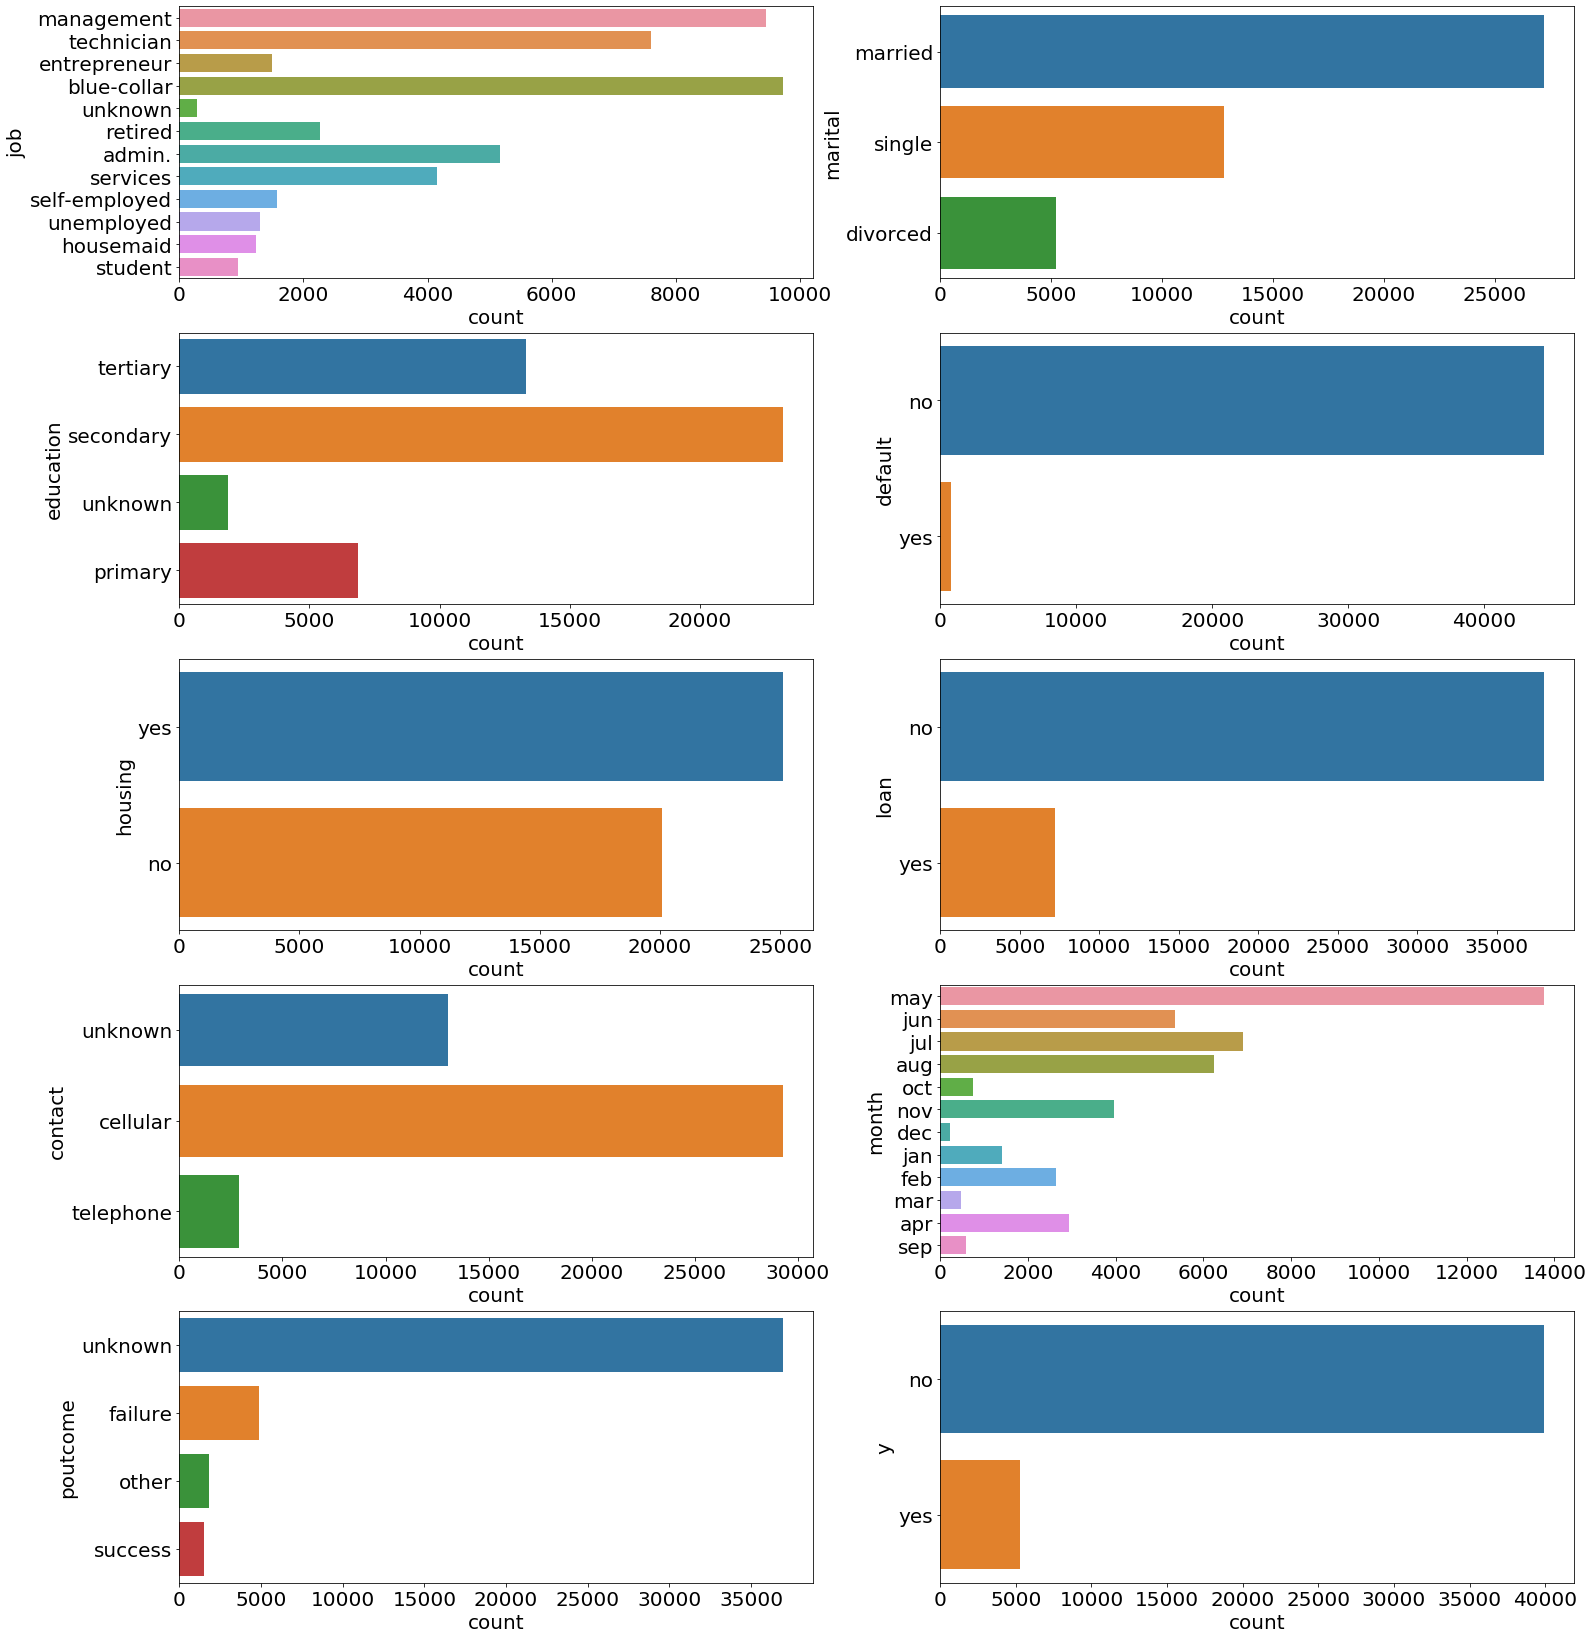

In [332]:
plt.figure(figsize=(25,35))

categorical_features = [col for col in df.columns if pd.api.types.is_string_dtype(df[col])]


for index, col in enumerate(categorical_features):
    plt.subplot(6, 2, index+1)
    ax = sns.countplot(y=col, data=df)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)
    
plt.savefig("Distributions.png")

In [333]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

['married' 'single' 'divorced']


(array([27214.,     0.,     0.,     0.,     0., 12790.,     0.,     0.,
            0.,  5207.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

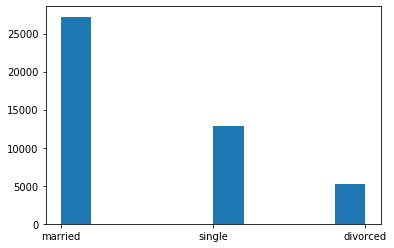

In [334]:
print(df.marital.unique())
plt.hist(df.marital)

['tertiary' 'secondary' 'unknown' 'primary']


(array([13301.,     0.,     0., 23202.,     0.,     0.,  1857.,     0.,
            0.,  6851.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

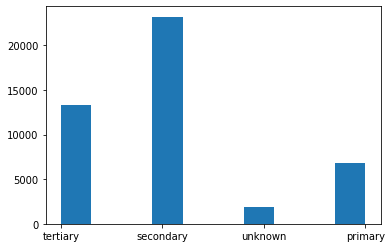

In [335]:
print(df.education.unique())
plt.hist(df.education)

['no' 'yes']


(array([44396.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   815.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

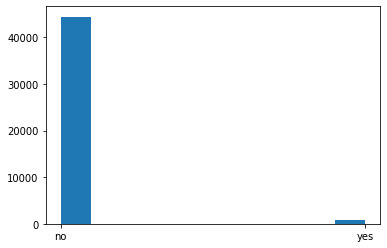

In [336]:
print(df.default.unique())
plt.hist(df.default)

['yes' 'no']


(array([25130.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20081.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

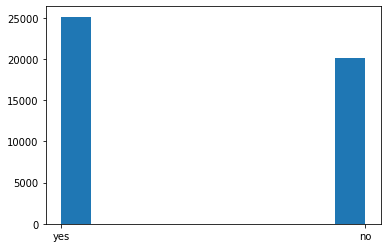

In [337]:
print(df.housing.unique())
plt.hist(df.housing)

['no' 'yes']


(array([37967.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7244.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

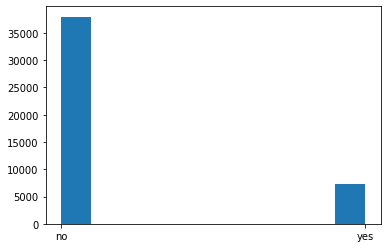

In [338]:
print(df.loan.unique())
plt.hist(df.loan)

['unknown' 'cellular' 'telephone']


(array([13020.,     0.,     0.,     0.,     0., 29285.,     0.,     0.,
            0.,  2906.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

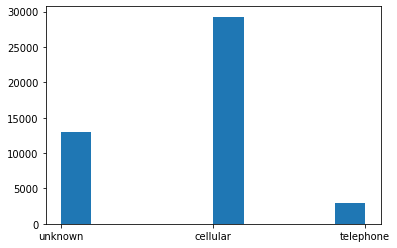

In [339]:
print(df.contact.unique())
plt.hist(df.contact)

['unknown' 'failure' 'other' 'success']


(array([36959.,     0.,     0.,  4901.,     0.,     0.,  1840.,     0.,
            0.,  1511.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

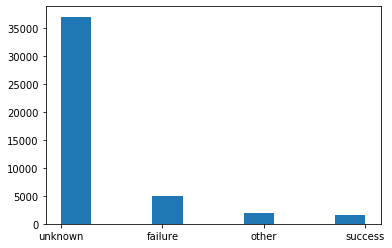

In [340]:
print(df.poutcome.unique())
plt.hist(df.poutcome)

['no' 'yes']


(array([39922.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5289.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

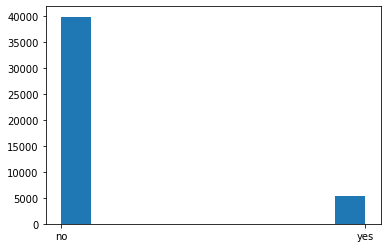

In [341]:
print(df.y.unique())
plt.hist(df.y)

In [342]:
print(str(len(df[df['y']=='yes'])) + " successful campaigns")
print(str(np.round(100* len( df[df['y']=='yes'])/df.shape[0], 2)) + "% of campaigns were successful")
(100*len(df[df['y']=='no'])/df.shape[0]) 

5289 successful campaigns
11.7% of campaigns were successful


88.30151954170445

# Numeric data
Now lets generate some summaries for the numerical data.

In [343]:
df[["age", "balance", "day", "duration", "campaign", "pdays", "previous"]].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Hence we can see that the mean age is 41.17, with the standard deviation of 10.57. The median is 39, which is less than the mean, indicating a slight left skew. The youngest person is 19 and the oldest is 87.

The mean balance is 1422.65, with the standard deviation of 3009.64. The median is 444, which is significantly less than the mean, indicating a heavy left skew.

The day represents the day of the month.

The mean duration for last contact is 263.96, with the standard deviation of 3.11. The median is 185, which is less than the mean, indicating a left skew. The shortest duration was 4 and the longest was 3025 seconds.

The mean number of contacts performed during this campaign for this client is 2.79, with the standard deviation of 259.86. The median is 2, which is less than the mean, indicating a left skew. The fewest was 1 and the most was 50.

The mean days since previous contact is 39.77, with the standard deviation of 100.12. The median is -1, however this is due to many values being -1, indicating that the customer was not contacted previously. Hence we need to remove the -1 value to get a more accurate description.

The mean number of contacts performed before this campaign for this client was 0.54, with a standard deviation of 1.69. The median is 0. This data also needs to be further analysed after removing the 0 value, since most of the customers were not contacted previously. 


### Days since previous contact (pdays)

In [344]:
pdays = df.pdays
pdays = pdays[pdays != -1]
print("       pdays  ")
print(pdays.describe())


       pdays  
count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64


Hence we can see after removing the -1 values, that for those customers that were contacted before this campaign the mean for days since previous contact is 224.87. The standard deviation is 117.20. The median is 189, indicating a left skew for the data. The least days was 1 and the most was 871.  

## Number of contacts performed before this campaign (previous)

In [345]:
previous = df.previous
previous = previous[previous != 0]
print("       previous")
print(previous.describe())

       previous
count    8257.000000
mean        3.177546
std         4.560820
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       275.000000
Name: previous, dtype: float64


Hence we can see after removing the 0 values, that for those customers that were contacted before this campaign the mean for number of contacts before the current campaign is 3.01. The standard deviation is 2.91. The median is 2, indicating a left skew for the data. The least was 1 and the most was 25.  

## Successful vs unsuccessful campaigns

In [346]:
successful = df.drop(df[df.y == 'no'].index)
unsuccessful = df.drop(df[df.y == 'yes'].index)

In [347]:
print("Successful campaigns = " + str(np.round(len(successful)/len(df)*100, 2)) + "%")
print("Unsuccessful campaigns = " + str(np.round(len(unsuccessful)/len(df)*100, 2))+ "%")

Successful campaigns = 11.7%
Unsuccessful campaigns = 88.3%


## Non-numeric data

### Job

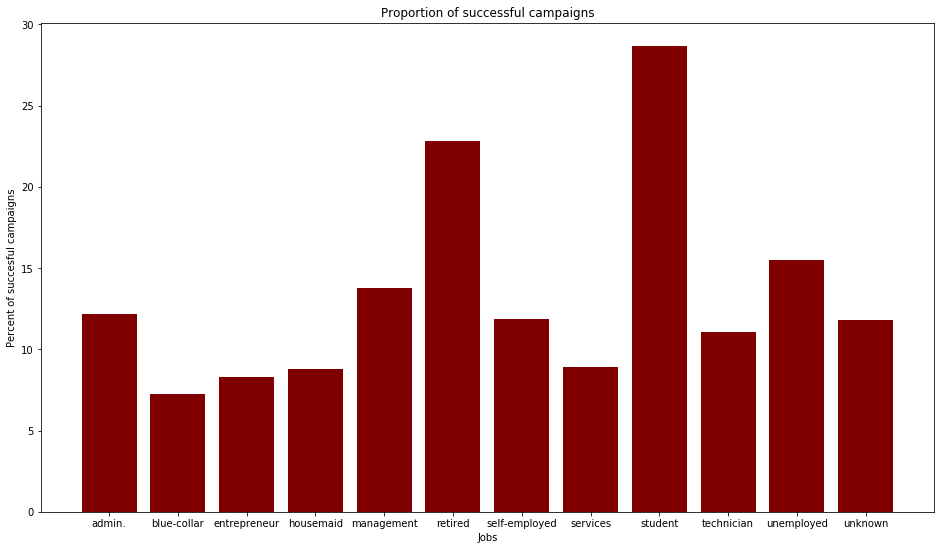

<Figure size 432x288 with 0 Axes>

In [348]:
successful_job = successful.job
unsuccessful_job = unsuccessful.job
s_unique, s_counts = np.unique(successful_job, return_counts=True) 
u_unique, u_counts = np.unique(unsuccessful_job, return_counts=True) 
proportions = []

for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))



fig = plt.figure(figsize = (16, 9))
 
# creating the bar plot
plt.bar(s_unique, proportions, color ='maroon',
        width = 0.8)

plt.xlabel("Jobs")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("jobs_prop.png")


### Marital Status

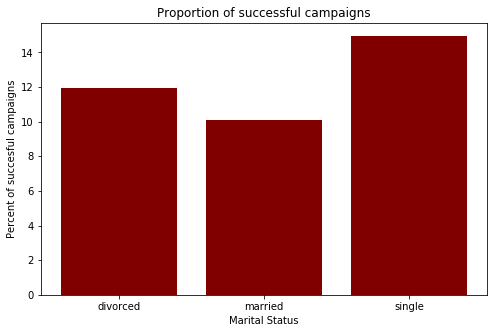

<Figure size 432x288 with 0 Axes>

In [349]:
s_married = successful.marital
u_married = unsuccessful.marital
s_unique, s_counts = np.unique(s_married, return_counts=True) 
u_unique, u_counts = np.unique(u_married, return_counts=True) 
proportions = []

for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))


fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(s_unique, proportions, color ='maroon',
        width = 0.8)
 
plt.xlabel("Marital Status")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("marital_prop.png")

### Education

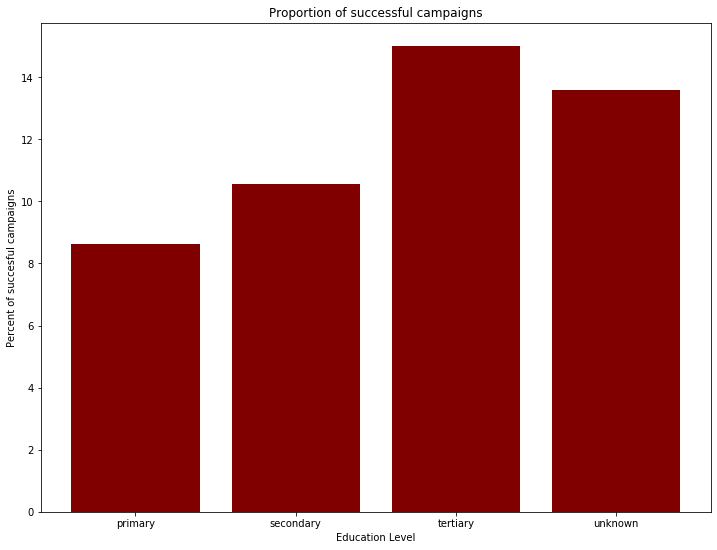

<Figure size 432x288 with 0 Axes>

In [350]:
s_edu = successful.education
u_edu = unsuccessful.education
s_unique, s_counts = np.unique(s_edu, return_counts=True) 
u_unique, u_counts = np.unique(u_edu, return_counts=True) 
proportions = []

for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))


fig = plt.figure(figsize = (12, 9))
 
# creating the bar plot
plt.bar(s_unique, proportions, color ='maroon',
        width = 0.8)
 
plt.xlabel("Education Level")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("edu_prop.png")

### default

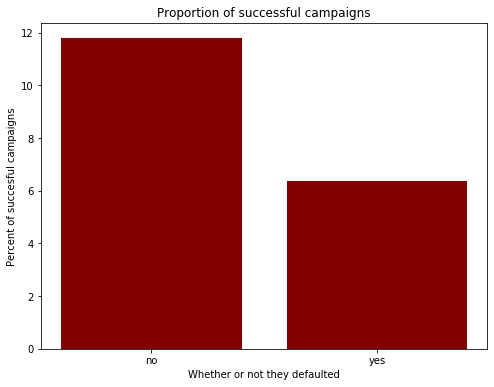

<Figure size 432x288 with 0 Axes>

In [351]:
s_default = successful.default
u_default = unsuccessful.default
s_unique, s_counts = np.unique(s_default, return_counts=True) 
u_unique, u_counts = np.unique(u_default, return_counts=True) 
proportions = []

for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))


fig = plt.figure(figsize = (8, 6))
 
# creating the bar plot
plt.bar(s_unique, proportions, color ='maroon',
        width = 0.8)
 
plt.xlabel("Whether or not they defaulted")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("default_prop.png")

### Housing

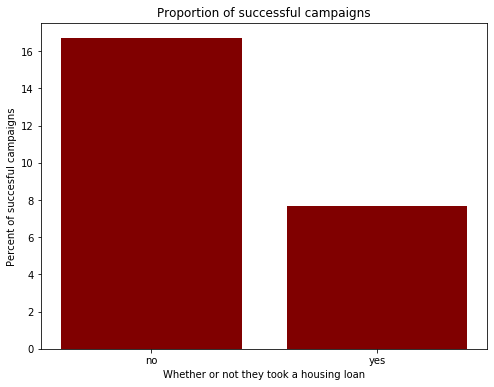

<Figure size 432x288 with 0 Axes>

In [352]:
s_housing = successful.housing
u_housing = unsuccessful.housing
s_unique, s_counts = np.unique(s_housing, return_counts=True) 
u_unique, u_counts = np.unique(u_housing, return_counts=True) 
proportions = []

for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))


fig = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(s_unique, proportions, color ='maroon',
        width = 0.8)
 
plt.xlabel("Whether or not they took a housing loan")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("housing_prop.png")

### Loan

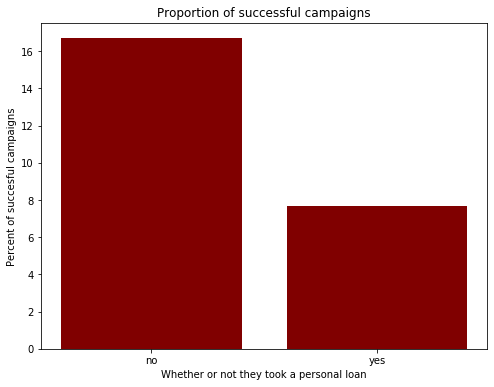

<Figure size 432x288 with 0 Axes>

In [353]:
s_loan = successful.loan
u_loan = unsuccessful.loan
s_unique, s_counts = np.unique(s_housing, return_counts=True) 
u_unique, u_counts = np.unique(u_housing, return_counts=True) 
proportions = []

for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))


fig = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(s_unique, proportions, color ='maroon',
        width = 0.8)
 
plt.xlabel("Whether or not they took a personal loan")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("loan_prop.png")

### Contact

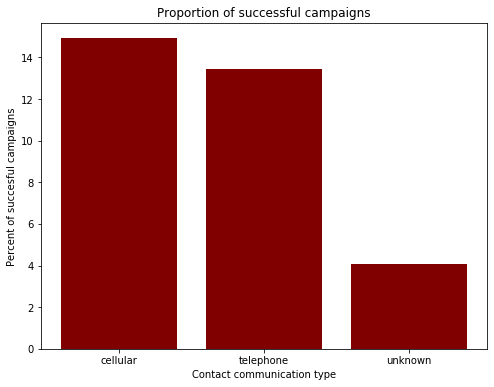

<Figure size 432x288 with 0 Axes>

In [354]:
s_contact = successful.contact
u_contact = unsuccessful.contact
s_unique, s_counts = np.unique(s_contact, return_counts=True) 
u_unique, u_counts = np.unique(u_contact, return_counts=True) 
proportions = []

for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))


fig = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(s_unique, proportions, color ='maroon',
        width = 0.8)
 
plt.xlabel("Contact communication type")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("contact_prop.png")

### Previous campaign outcome (poutcome)

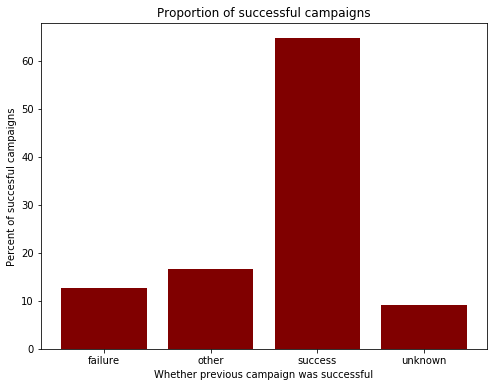

<Figure size 432x288 with 0 Axes>

In [355]:
s_pout = successful.poutcome
u_pout = unsuccessful.poutcome
s_unique, s_counts = np.unique(s_pout, return_counts=True) 
u_unique, u_counts = np.unique(u_pout, return_counts=True) 
proportions = []

for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))


fig = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(s_unique, proportions, color ='maroon',
        width = 0.8)
 
plt.xlabel("Whether previous campaign was successful")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("previous_prop.png")

## Numeric Data

For this data we need to plot histograms with appropriate buckets

### Age

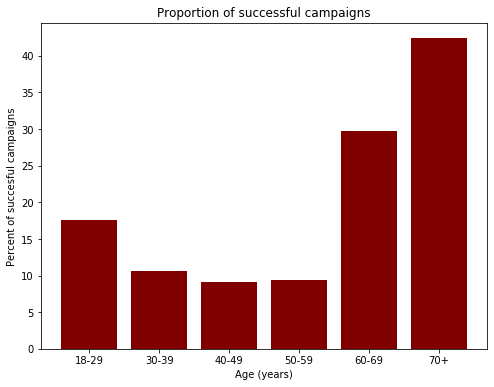

<Figure size 432x288 with 0 Axes>

In [356]:
counts = np.array([(0,0),(0,0),(0,0),(0,0),(0,0),(0,0)])
proportions = [0,0,0,0,0,0]
# proportions are 18-29, 30-39, 40-49, 50-59, 60-69, 70+ 
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
for i, row in df.iterrows():
    age = row.age
    success = 1 if row.y == 'yes' else 0
    if 18<=age<=29:
        counts[0][success] += 1
    if 30<=age<=39:
        counts[1][success] += 1
    if 40<=age<=49:
        counts[2][success] += 1
    if 50<=age<=59:
        counts[3][success] += 1
    if 60<=age<=69:
        counts[4][success] += 1
    if age>=70:
        counts[5][success] += 1
         

for i in range(len(counts)):
    proportions[i] = 100 * counts[i][1]/(counts[i][0]+counts[i][1])
        
fig = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(labels, proportions, color ='maroon', width = 0.8)
 
plt.xlabel("Age (years)")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("age_prop.png")

### Balance

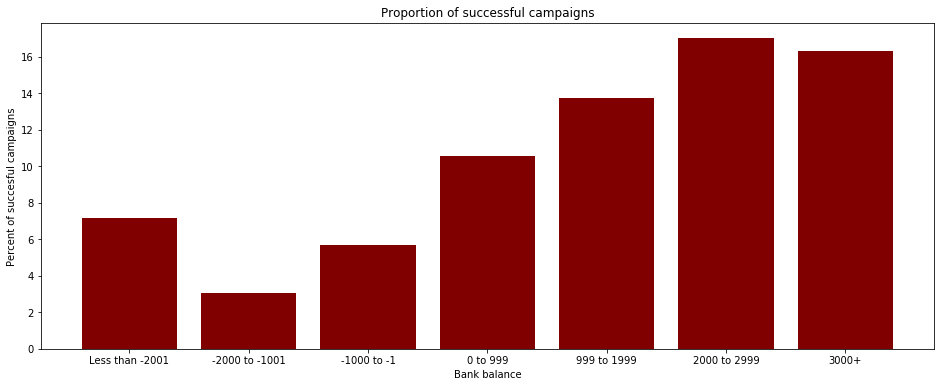

<Figure size 432x288 with 0 Axes>

In [357]:
counts = np.array([(0,0),(0,0),(0,0),(0,0),(0,0),(0,0),(0,0)])
proportions = [0,0,0,0,0,0,0]
# proportions are 
"""
-inf to -2000, 
-2000 to -1001, 
-1000 to -1, 
0 to 999 ,
999 to 1999 , 
2000 to 2999, 
3000+ 
"""
labels = ['Less than -2001',  '-2000 to -1001', '-1000 to -1', '0 to 999', '999 to 1999', '2000 to 2999', '3000+']
for i, row in df.iterrows():
    balance = row.balance
    success = 1 if row.y == 'yes' else 0
    if -99999<=balance<=-2001:
        counts[0][success] += 1
    if -2000<=balance<=-1001:
        counts[1][success] += 1
    if -1000<=balance<=-1:
        counts[2][success] += 1
    if 0<=balance<=999:
        counts[3][success] += 1
    if 1000<=balance<=1999:
        counts[4][success] += 1
    if 2000<=balance<=2999:
        counts[5][success] += 1
    if balance>=3000:
        counts[6][success] += 1
         

for i in range(len(counts)):
    proportions[i] = 100 * counts[i][1]/(counts[i][0]+counts[i][1])
        
fig = plt.figure(figsize = (16,6))
 
# creating the bar plot
plt.bar(labels, proportions, color ='maroon', width = 0.8)
 
plt.xlabel("Bank balance")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("balance_prop.png")

### duration

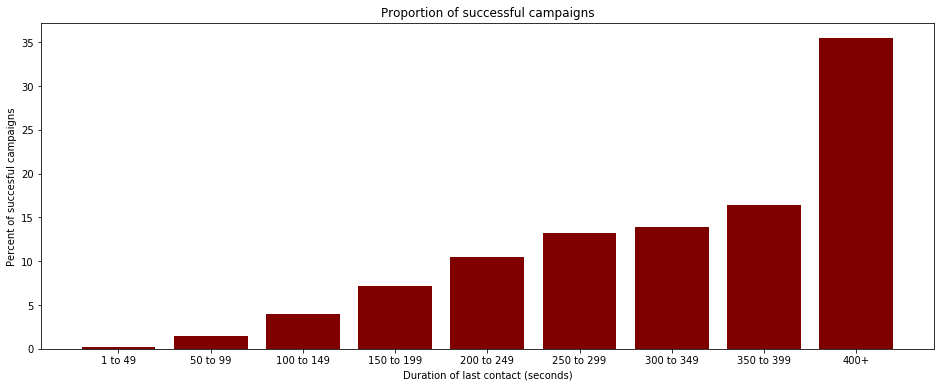

<Figure size 432x288 with 0 Axes>

In [358]:
counts = np.array([(0,0),(0,0),(0,0),(0,0),(0,0),(0,0),(0,0),(0,0),(0,0)])
proportions = [0,0,0,0,0,0,0,0,0]
# proportions are 
"""
1 to 49, 
50 to 99, 
100 to 149, 
150 to 199 ,
200 to 249 , 
250 to 299, 
300+ 
"""
labels = ['1 to 49', '50 to 99', '100 to 149', '150 to 199' ,'200 to 249' ,'250 to 299', '300 to 349', '350 to 399', '400+']
for i, row in df.iterrows():
    duration = row.duration
    success = 1 if row.y == 'yes' else 0
    if 1<=duration<=49:
        counts[0][success] += 1
    if 50<=duration<=99:
        counts[1][success] += 1
    if 100<=duration<=149:
        counts[2][success] += 1
    if 150<=duration<=199:
        counts[3][success] += 1
    if 200<=duration<=249:
        counts[4][success] += 1
    if 250<=duration<=299:
        counts[5][success] += 1
    if 300<=duration<=349:
        counts[6][success] += 1
    if 350<=duration<=399:
        counts[7][success] += 1
    if duration>=400:
        counts[8][success] += 1
    

for i in range(len(counts)):
    proportions[i] = 100 * counts[i][1]/(counts[i][0]+counts[i][1])
        
fig = plt.figure(figsize = (16,6))
 
# creating the bar plot
plt.bar(labels, proportions, color ='maroon', width = 0.8)
 
plt.xlabel("Duration of last contact (seconds)")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("duration_prop.png")

### campaign

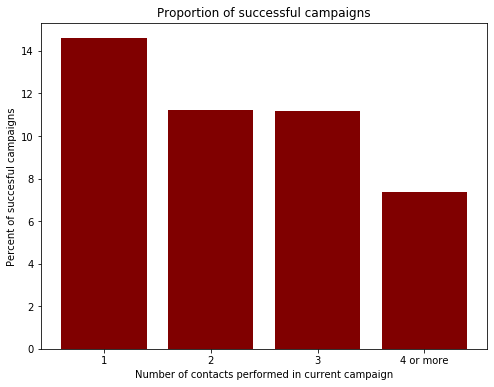

<Figure size 432x288 with 0 Axes>

In [359]:
counts = np.array([(0,0),(0,0),(0,0),(0,0)])
proportions = [0,0,0,0]
# proportions are 1, 2, 3, 3+
labels = ['1', '2', '3', '4 or more']
for i, row in df.iterrows():
    campaign = row.campaign
    success = 1 if row.y == 'yes' else 0
    if campaign==1:
        counts[0][success] += 1
    if campaign==2:
        counts[1][success] += 1
    if campaign==3:
        counts[2][success] += 1
    if campaign>3:
        counts[3][success] += 1

for i in range(len(counts)):
    proportions[i] = 100 * counts[i][1]/(counts[i][0]+counts[i][1])
        
fig = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(labels, proportions, color ='maroon', width = 0.8)
 
plt.xlabel("Number of contacts performed in current campaign")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("campaign_prop.png")

### pdays

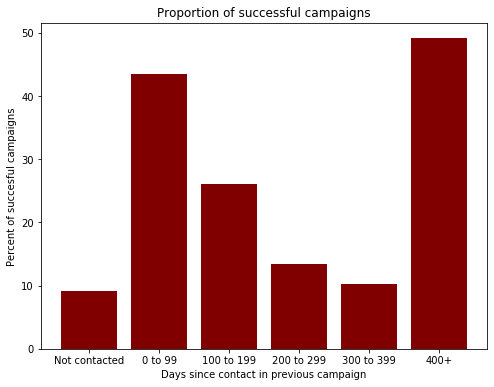

<Figure size 432x288 with 0 Axes>

In [360]:
counts = np.array([(0,0),(0,0),(0,0),(0,0),(0,0),(0,0)])
proportions = [0,0,0,0,0,0]
# proportions are not contacted(-1), 0 to 100, 100 to 200, 200 to 300, 300 to 400, 400+ 
labels = ['Not contacted', '0 to 99', '100 to 199', '200 to 299', '300 to 399', '400+']
for i, row in df.iterrows():
    pdays = row.pdays
    success = 1 if row.y == 'yes' else 0
    if pdays==-1:
        counts[0][success] += 1
    if 0<=pdays<=99:
        counts[1][success] += 1
    if 100<=pdays<=199:
        counts[2][success] += 1
    if 200<=pdays<=299:
        counts[3][success] += 1
    if 300<=pdays<=399:
        counts[4][success] += 1
    if pdays>=400:
        counts[5][success] += 1
         

for i in range(len(counts)):
    proportions[i] = 100 * counts[i][1]/(counts[i][0]+counts[i][1])
        
fig = plt.figure(figsize = (8,6))
 
# creating the bar plot
plt.bar(labels, proportions, color ='maroon', width = 0.8)
 
plt.xlabel("Days since contact in previous campaign")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("pdays_prop.png")

### previous

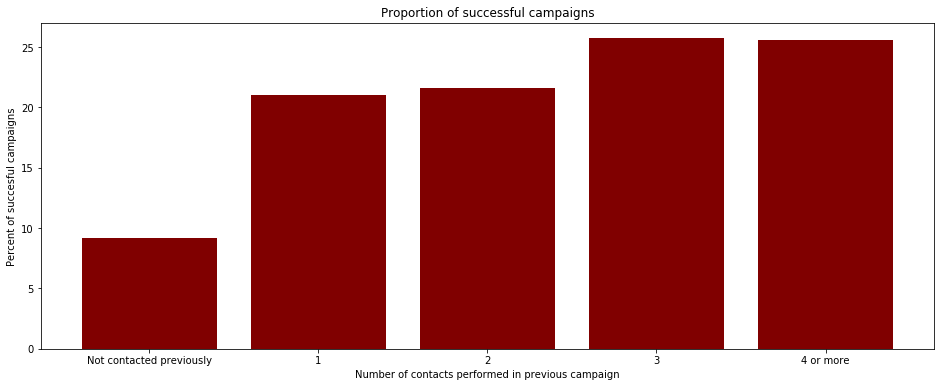

<Figure size 432x288 with 0 Axes>

In [361]:
counts = np.array([(0,0),(0,0),(0,0),(0,0),(0,0)])
proportions = [0,0,0,0,0]
# proportions are 0, 1, 2, 3, 4+
labels = ['Not contacted previously','1', '2', '3', '4 or more']
for i, row in df.iterrows():
    previous = row.previous
    success = 1 if row.y == 'yes' else 0
    if previous ==0:
        counts[0][success] += 1
    if previous==1:
        counts[1][success] += 1
    if previous==2:
        counts[2][success] += 1
    if previous==3:
        counts[3][success] += 1
    if previous>3:
        counts[4][success] += 1

for i in range(len(counts)):
    proportions[i] = 100 * counts[i][1]/(counts[i][0]+counts[i][1])
        
fig = plt.figure(figsize = (16,6))
 
# creating the bar plot
plt.bar(labels, proportions, color ='maroon', width = 0.8)
 
plt.xlabel("Number of contacts performed in previous campaign")
plt.ylabel("Percent of succesful campaigns")
plt.title("Proportion of successful campaigns")
plt.show()
plt.savefig("previous_prop.png")

## Correlation

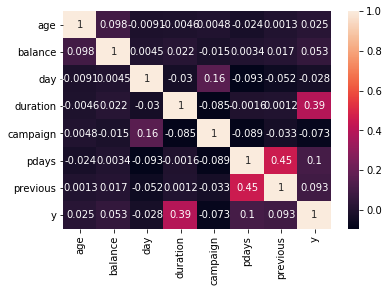

In [362]:
df["y"] = np.where(df["y"] == "yes", 1, 0)
f=df.corr()
f
sns.heatmap(f,annot=True,) 

## Logistic Regression model

In [363]:
# Split dataset into train and test (80/20)
train = df.sample(frac=0.8,random_state=42)
test  = df.drop(train.index)

In [364]:
# Convert target variable to numeric
y = np.where(train["y"] == 1, 1, 0)

In [365]:
import statsmodels.api as sm
X = train[["age", "duration", "campaign", "previous"]]
# add constant value for the intercept term
X = sm.add_constant(X)

# define and fit model
full_logistic_regression_model = sm.Logit(y, X)
result = full_logistic_regression_model.fit(maxiter=500)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.298139
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                36169
Model:                          Logit   Df Residuals:                    36164
Method:                           MLE   Df Model:                            4
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.1732
Time:                        14:30:33   Log-Likelihood:                -10783.
converged:                       True   LL-Null:                       -13042.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2933      0.077    -42.771      0.000      -3.444      -3.142
age            0.0076      0.

In [366]:
predict_params = test[["age", "duration", "campaign", "previous"]]
predict_params = sm.add_constant(predict_params)

predictions = result.predict(predict_params)


In [367]:
actual = np.where(test["y"] == 1, 1, 0)
threshold = 0.50
tp = 0
tn = 0
fp = 0
fn = 0

predictions = np.array(predictions)
for i in range(len(predictions)):
    if predictions[i]>=threshold and actual[i]==1:
        tp += 1
    if predictions[i]<threshold and actual[i]==0:
        tn += 1
    if predictions[i]>=threshold and actual[i]==0:
        fp += 1
    if predictions[i]<threshold and actual[i]==1:
        fn += 1


accuracy = (tp+tn) / (tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
print("Accuracy = " + str(np.round(accuracy*100, 2))+"%")
print("Precision = " + str(np.round(precision*100, 2))+"%")
print("Recall = " + str(np.round(recall*100, 2))+"%")

Accuracy = 89.36%
Precision = 66.13%
Recall = 19.47%


### Removing duration

In [368]:
X = train[["age", "campaign", "previous"]]
# add constant value for the intercept term
X = sm.add_constant(X)

# define and fit model
full_logistic_regression_model = sm.Logit(y, X)
result = full_logistic_regression_model.fit(maxiter=500)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.352867
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                36169
Model:                          Logit   Df Residuals:                    36165
Method:                           MLE   Df Model:                            3
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                 0.02140
Time:                        14:30:34   Log-Likelihood:                -12763.
converged:                       True   LL-Null:                       -13042.
Covariance Type:            nonrobust   LLR p-value:                1.206e-120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0667      0.068    -30.516      0.000      -2.199      -1.934
age            0.0065      0.

In [369]:
predict_params = test[["age", "campaign", "previous"]]
predict_params = sm.add_constant(predict_params)

predictions = result.predict(predict_params)


In [370]:
actual = np.where(test["y"] == 1, 1, 0)
threshold = 0.16
tp = 0
tn = 0
fp = 0
fn = 0

predictions = np.array(predictions)
for i in range(len(predictions)):
    if predictions[i]>=threshold and actual[i]==1:
        tp += 1
    if predictions[i]<threshold and actual[i]==0:
        tn += 1
    if predictions[i]>=threshold and actual[i]==0:
        fp += 1
    if predictions[i]<threshold and actual[i]==1:
        fn += 1


accuracy = (tp+tn) / (tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
print("Accuracy = " + str(np.round(accuracy*100, 2))+"%")
print("Precision = " + str(np.round(precision*100, 2))+"%")
print("Recall = " + str(np.round(recall*100, 2))+"%")

Accuracy = 85.78%
Precision = 28.76%
Recall = 14.21%


The model has a precision score of 41.1%, which means that when it classifies a customer to have campaigned succesfully it is correct 41.1% of the time.

The recall is 31.25%, which means it correctly classifies only 31.25% of the successful campaigns.

We can adjust the threshold so that the recall is increased. This may decrease the precision, however we can see that in this use case recall is more important. With the current score of 25% precision and 77% recall, it would mean that 1 in every 4 customers that we think is successful would be successful, and 3 in 4 customers who were actually succesful would be classified correctly.

for all the customers we thought were succesful, only 15% actually were

for all the customers that were succesful, we got 60% of them

## Hypothesis Testing

In [371]:
successful_job = successful.job
unsuccessful_job = unsuccessful.job
s_unique, s_counts = np.unique(successful_job, return_counts=True) 
u_unique, u_counts = np.unique(unsuccessful_job, return_counts=True) 
proportions = []
n = df.shape[0]
for i in range(len(s_counts)):
    if s_unique[i] != u_unique[i]:
        print("Different order.")
    proportions.append(100*s_counts[i]/(u_counts[i]+s_counts[i]))

students_proportion = s_counts[8]/(u_counts[8]+s_counts[8])
std_dev = np.sqrt(students_proportion*(1-students_proportion))
Z = stats.norm.ppf(1-0.05)

lb = students_proportion - (Z*std_dev/np.sqrt(n))
ub = students_proportion + (Z*std_dev/np.sqrt(n))

In [372]:
print("For students the confidence interval was - (" + str(np.round(lb,4))+", "+str(np.round(ub,4))+")")

For students the confidence interval was - (0.2833, 0.2903)


In [373]:
retired_proportion = s_counts[5]/(u_counts[5]+s_counts[5])
std_dev = np.sqrt(retired_proportion*(1-retired_proportion))
Z = stats.norm.ppf(1-0.05)

lb = retired_proportion - (Z*std_dev/np.sqrt(n))
ub = retired_proportion + (Z*std_dev/np.sqrt(n))

In [374]:
print("For retired the confidence interval was - (" + str(np.round(lb,4))+", "+str(np.round(ub,4))+")")

For retired the confidence interval was - (0.2247, 0.2312)
